> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
import numpy as np

def corr2d(X: np.array, K: np.array) -> np.array:
    X_height, X_width = X.shape
    
    if K.ndim == 1:
        K = K.reshape((1, K.shape[0]))
        K_height, K_width = 1, K.shape[1]
    else:
        K_height, K_width = K.shape
    
    output_height = X_height - K_height + 1
    output_width = X_width - K_width + 1
    output = np.zeros((output_height, output_width))
  
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(X[i:i+K_height, j:j+K_width] * K)
    
    return output 
    pass

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    num_input_channels, _, _ = X.shape
    output = None
    
    for i in range(num_input_channels):
        if output is None:
            output = corr2d(X[i], K[i])
        else:
            output += corr2d(X[i], K[i])
    
    return output

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    num_out_channels, num_in_channels, _, _ = K.shape
    output = None
    
    for i in range(num_out_channels):
        if output is None:
            output = corr2d_multiple_input_channels(X, K[i])
        else:
            output = np.dstack((output, corr2d_multiple_input_channels(X, K[i])))
    
    return output

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 155. 191. 227.]
  [149. 197. 245. 293.]]

 [[209. 281. 353. 425.]
  [239. 323. 407. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)



##Computational benefits
  Reduced computational cost by performing fewer operations.

  Faster processing and inference time.

##Statistical benefits

  Increased receptive field, capturing more context.
  
  Improved generalization by down-sampling and reducing spatial dimensions

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[-1. -1.]
 [-1. -1.]
 [-1. -1.]]


In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

ValueError: ignored

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
import numpy as np
def max_pool2d(X: np.array, K: tuple) -> np.array:
  k_h, k_w = K # (k_h = k_height and k_w= k_width)
  input_h, input_w = X.shape
  output_h = input_h // k_h
  output_w = input_w // k_w

  output = np.zeros((output_h,output_w))
  
  for i in range(output_h):
    for j in range(output_h):
        pool_region = X[i*k_h : (i+1)*k_h, j*k_w : (j+1)*k_w]
        max_value = np.max(pool_region)
        output[i,j] = max_value

  return output


    # write a function for this job

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

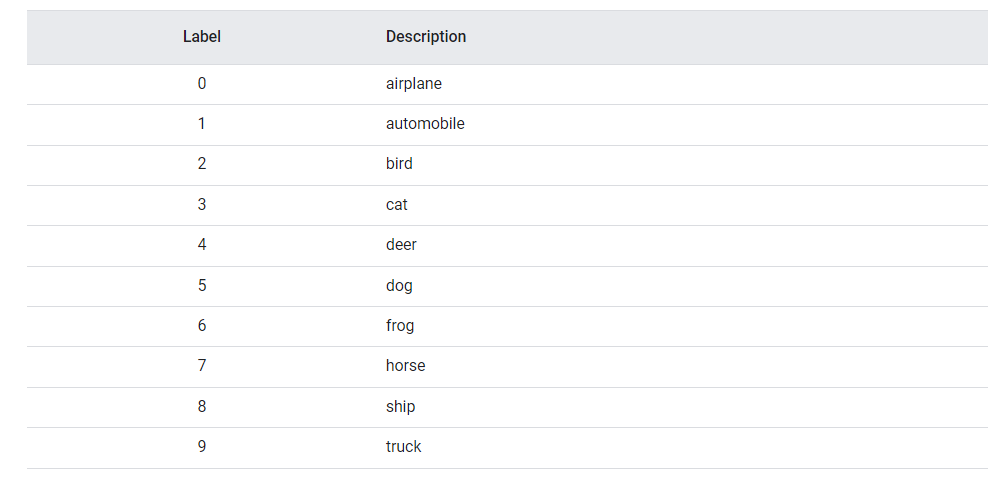

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:Adam is a popular optimization algorithm used in deep learning. 
It combines the good parts of 2 other algorithms, AdaGrad and RMSProp, to train neural networks in a good way. 
Adam is especially useful when dealing with complex networks and messy data.

The main idea behind Adam is to adjust the learning rate for each parameter in the network based on the gradients. 
It does this by estimating the avg of the gradients and their squares. 
After this Adam helps the network learn faster and makes it less sensitive to the settings chosen for training.

Adam has three important components: momentum, AdaGrad, and RMSProp. 
Momentum keeps track of the previous gradients that helps the network converge faster. 
AdaGrad adjusts the learning rate based on the gradient magnitudes. 
RMSProp normalizes the learning rate to prevent it from getting too small or too large during training.

Combining  components Adam finds a good balance betwn adaptiveness and convergence speed. 
It calculates the learning rate for each parameter by the gradients and their averages. 
It also corrects for any biases in the initialization of the network.

Adam is widely used because it is reliable,, efficient and easy to use. 
It works well for diffrent deep learning tasks and is mostly the common choice for training neural networks. 
Its performance can vary depending on the specific problem and dataset.
"""

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is a count of how good a machine learning model performs on new, 
unseen data. It gives us how much the model can tell the right labels  for this new data. 
The validation dataset is different from the one used for training the model and 
helps us understand how well the model can handle real-world situations. 

When the validation accuracy is high, it means the model is doing a good job. 
But if the accuracy is low, it suggests that the model may not be performing well on unseen data or
 it may be focusing too much on the training data without generalizing well.
"""

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )




Answer: Overfitting and underfitting are two common problems in machine learning that can affect how well a model works.

Overfitting happens when a model learns too much from the training data and becomes too more for it. 
Its like the model tries too hard to remember every little detail in the training data the noise and irrelevant stuff etc. 
This can make the model perform really well on the training data but it might not work well on new  unseen data. 

Underfitting happens when a model is too simple and dont catch the important patterns in the training data. 
Its like having a model that dont learn more from the data and cannt make exact predictions. 
Its like trying to solve a complex problem with a very basic approach.

Both overfitting and underfitting are not good. We want our models to find a balance. 
We want them to learn the important patterns from the data without getting too obsessed with every little detail or like being too simplistic.

To prevent the overfitting we can use techniques like regularization. Regularization puts some rules on the model to keep it from becoming too complexx. 
It helps the model focus on the important patterns and ignore the noise.

To tackle underfitting, we can use more advanced models or add more features to capture the complexities of the data.

Finding the right balance between model complexity and the available data is important. 
Techniques like cross-validation can help us understand how well our models will work on new data.

In simple terms overfitting is like studying just the questions from a past exam without understanding the concepts. 
Underfitting is like having a model that is too simple to solve a complex problem. 
We want our models to find the right balance and learn the important patterns from the data without getting too caught up in the details or being too simplistic.
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)



Answer: Regularization techniques in machine learning are method used to prevent  overfitting. 

Regularization techniques help in avoiding overfitting by controlling the complexity of the model. 
They do this by adding some rules or penalties during the learning process.

One technique is L1 regularization (or Lasso regularization) which adds a penalty to the model's loss function. 
This penalty encourages the model to use fewer features and focus on the most important ones.

Another technique is L2 regularization (or Ridge regularization) which also adds a penalty to the loss function. 
This penalty makes the model's parameters smaller and reduces the impact of individual features.

There are other techniques like dropout which randomly turns off some parts of the model during training to avoid relying too much on specific parts. 
also another technique is early stopping, which stops the training process when the model starts to perform worse on a validation set.

These regularization techniques help in controlling the complexity of the model and make it better at working with new data. 
By preventing overfitting, they help the model generalize well and perform better on unseen examples.
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: A dropout layer is a special technique used in neural networks to make them better at learning from data. 
It helps prevent  overfitting where the network becomes too focused on the training examples and 
doesn't generalize well to new unseen data.

 how dropout works
Imagine you have a bunch of neurons in a layer of your network. During training, 
the dropout layer randomly turns off (or "drops out") some of these neurons which means they don't contribute to the computation. 
The specific neurons that are dropped out change randomly with each training example.

By dropping out neurons the network is forced to learn more independently. 
It cannt rely too much on any single neuron bcoz it might be randomly dropped out at any time. 
This encourages the network to learn more robust and diverse features from the data.

The dropout rate determines how many neurons are dropped out. 
For eg. if the dropout rate is 0.2, 
then 20% of the neurons will be randomly dropped out during training. The dropout rate is commonly set between 20% to 50% depending on the problem.

During testing or when making predictions dropout is turned off. But to make sure the network still works correctly, 
the output of the dropout layer is scaled down by the dropout rate. This scaling ensures that the expected sum of the outputs remains the same.

In simple terms dropout is like randomly temporarily removing some brain cells from the network during training to make it more resilient and adaptable. 
This helps the network learn better and prevents it from getting too fixated on specific examples. 
Its like giving the network a bit of randomness which can be helpful for improving its performance.
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: L1 normalization is a technique used in machine learning or basically we can say  in Generative Adversarial Networks (GANs)
 to prevent overfitting and improve the performance of the model.

In GANs, L1 normalization is commonly applied to the generator network. 
The main idea behind L1 normalization is to encourage the generator to produce more focused and diverse outputs by penalizing large weights. 
It does this by limiting the magnitude of the weights in the network.

The formula for L1 normalization is as follows:

L1_norm = λ * E|w|

In this formula, L1_norm represents the L1 normalization term λ is a parameter that controls the strength of the regularization, 
E denotes the sum of the absolute values of all the weights (w) in the generator network.

By including the L1 normalization term in the generators loss function, 
the generator is motivated to minimize the sum of the absolute values of its weights. As a result
the generator learns to rely on a smaller set of important weights leading to sparser and more diverse feature generation.

The regularization parameter (λ) determines how much emphasis is given to L1 normalization in the overall loss function. 
A higher value of λ increases the penalty for large weights which encourages more sparsity in the generated outputs. 
if λ is set too high, the generator may produce overly simplistic outputs causing underfitting.

summery - L1 normalization in GANs helps control the complexity of the generator network 
improves the model's ability to generalize and encourages the generation of more varied and less correlated features.
"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer:L2 normalization, also known as Euclidean normalization, 
is a technique used in machine learning and data analysis to make data vectors have the same length. 
Its like resizing all the vectors so that they become equal in size. 
This method is widely used in different fields such as image processing, natural language processing,& recommender systems.

The formula for L2 normalization is quite simple. You take the original vector and divide it by the L2 norm of the vector. 
The L2 norm is calculated by finding the square root of the sum of the squared values of all the components in the vector.

By dividing each component of the original vector by its L2 norm, the L2 normalization scales the vector so that its length becomes 1. 
Its like stretching or shrinking the vector but maintaining its direction. 
Think of it as projecting the vector onto a circle or sphere with a radius of 1.

L2 normalization is commonly used in machine learning to preprocess data before feeding it into algorithms. 
One important use is to ensure that all features or data points have equal importance or influence in computations. 
This is especially useful when dealing with data that has different scales or variations. 
By normalizing the data, you can prevent certain features from dominating the learning process just because they have larger values.

Another benefit of L2 normalization is that it can be used for similarity calculations. 
Since it emphasizes the direction of vectors rather than their magnitudes it becomes easier to compare vectors based on their orientations.

Overall- L2 normalization is a handy technique to standardize the length and direction of data vectors, 
making them more comparable and suitable for various machine learning tasks.
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentation techniques are used in machine learning to make the training dataset bigger and more diverse. 
This is done by applying different changes or modifications to the existing data, 
creating new samples that are similar but not exactly the same as the original data. 
these new samples are then added to the training dataset giving the model more varied examples to learn from.

Data augmentation is important for several reasons. 
firstly - it can be difficult and expensive to collect a large labeled dataset for training. 
data augmentation helps solve this problem by generating more training samples from the existing ones, 
effectively making the dataset larger and improving the model's ability to learn.

secondly - data augmentation introduces variations and diversity into the training data, 
which makes the model better at handling different situations and reduces overfitting. 
By exposing the model to augmented samples it learns to handle transformations, noise, 
or distortions that can happen in real-world scenarios. 
This makes the model more adaptable to unseen data and improves its overall performance.

lastly - data augmentation is useful for dealing with class imbalance. 
In many classification problems some classes have fewer examples than others, 
which can lead to biased models. By applying augmentation techniques to the minority class samples, 
the class distribution can be balanced, preventing the model from favoring the majority class and 
improving its ability to classify all classes accurately.

Common data augmentation techniques include changing images by rotating, scaling,
 flipping, cropping, or adding noise. In natural language processing techniques like replacing words,
3inserting or deleting words can be used. These techniques increase the diversity of the training data and 
help the model handle different variations and uncertainties in real-world situations.

summary-  data augmentation is important in machine learning 
because it helps overcome the limitations of limited training data 
improves the model's ability to handle different situations reduces overfitting, 
and addresses class imbalance. By creating more diverse training samples 
the model can learn from a wider range of examples, leading to better performance and accuracy.

SOURCE - ALL from chat gpt
"""

####**Did you take note of the change in the cell at the start of these 

---

subjective questions ?**

In [ ]:
"ANS(Yes/No): no  "